<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

# Adam GD BATCH

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [2]:
df = pd.read_csv("MultipleLR.csv",names=["x1","x2","x3","y_target"])
df.sample(5)

,x1,x2,x3,y_target
13,79,80,73,152
9,79,70,88,164
1,93,88,93,185
21,86,82,89,175
15,93,89,96,192


In [3]:
df.insert(0,"x0",1)
df.head()

,x0,x1,x2,x3,y_target
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142


In [4]:
x = df.drop("y_target",axis=1)
y = df["y_target"].values.reshape(df.shape[0],1)


#### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D


In [5]:
y = y.ravel()
y

array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
       152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192],
      dtype=int64)

In [6]:
x = np.array(x)
x

array([[  1,  73,  80,  75],
       [  1,  93,  88,  93],
       [  1,  89,  91,  90],
       [  1,  96,  98, 100],
       [  1,  73,  66,  70],
       [  1,  53,  46,  55],
       [  1,  69,  74,  77],
       [  1,  47,  56,  60],
       [  1,  87,  79,  90],
       [  1,  79,  70,  88],
       [  1,  69,  70,  73],
       [  1,  70,  65,  74],
       [  1,  93,  95,  91],
       [  1,  79,  80,  73],
       [  1,  70,  73,  78],
       [  1,  93,  89,  96],
       [  1,  78,  75,  68],
       [  1,  81,  90,  93],
       [  1,  88,  92,  86],
       [  1,  78,  83,  77],
       [  1,  82,  86,  90],
       [  1,  86,  82,  89],
       [  1,  78,  83,  85],
       [  1,  76,  83,  71],
       [  1,  96,  93,  95]], dtype=int64)

In [96]:
def adam_gradient_descent(x, y_true, epochs, learning_rate = 0.006 , Bita1 = 0.6 , Bita2 = 0.6):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape = (num_features))
    mt = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    theta_3 = []
    hypothesis = []
    for i in range(epochs):
        
        if i > 2 :
            if np.abs(cost_list[-1] - cost_list[-2]) < 0.001 :
                print("Stopped at epoch number  = ",i)
                break
            if np.linalg.norm(thetas_grad) < 0.001:
                print("Stopped at epoch number  = ",i)
                break
                

        # Calculate Y predected
        y_predict = np.dot( thetas , x.T ) 
        # Getting the gradient with current thetas values
        thetas_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        # bias_grad = (2/Nobservations)*np.sum(y_predict - y_true)
        # Calculating Mt
        mt = (Bita1 * mt) + ((1-Bita1) * thetas_grad)
        # Calculate Vt 
        vt = (Bita2 * vt) + ((1 - Bita2) * np.square(thetas_grad))
        # Updating thetas and bias values
        thetas = thetas - ( (learning_rate / (np.sqrt(vt) + 1e-8)) * mt)
        # bias = bias -learning_rate * bias_grad
        # Calculate the cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        cost_list.append(cost)
        epochs_list.append(i)
        # print(thetas)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
        theta_3.append(thetas[2])
        if i > 2 :
            print(np.abs(cost_list[-1] - cost_list[-2]))    
    Hypo = np.dot(thetas, x.T)
    hypothesis.append(Hypo)
    
    return thetas, theta_1, theta_2, theta_3, cost, cost_list, epochs_list, hypothesis
        
        


In [97]:
ADAM_theta, ADAM_theta_1, ADAM_theta_2, ADAM_theta_3, ADAM_cost, ADAM_cost_list, ADAM_epoch_list, ADAM_Hypothesis= adam_gradient_descent(x,y,1000)
ADAM_theta, ADAM_cost

416.34919692710537
435.0662072297564
443.94836832626606
447.33016060809314
447.5518111029669
445.93166345840655
443.2295553891963
439.8890468319296
436.17094653553795
432.22923446814093
428.15502417680545
424.0022925657213
419.80303284797264
415.57621042880055
411.3330665869289
407.08026251752744
402.82174395365655
398.5598471055673
394.29595452779904
390.03088397147803
385.7651188454074
381.4989447457665
377.23253030081105
372.96597501768156
368.69933758419756
364.4326525999222
360.1659404607599
355.89921319488894
351.63247790599235
347.3657388033098
343.09899839760146
338.8322582052642
334.5655191625301
330.2987818690344
326.0320467310048
321.76531404542584
317.4985840496811
313.23185695084794
308.9651329431981
304.6984122188005
300.43169497412055
296.1649814143693
291.8982717565523
287.6315662318084
283.36486508747294
279.0981685889765
274.83147702173665
270.56479069320994
266.2981099350018
262.03143510530117
257.764766591461
253.49810481291024
249.2314502244335
244.96480331976545
2

(array([0.67036586, 0.66895294, 0.66848872, 0.6792716 ]), 12.033534089223124)

In [98]:
ADAM_Hypothesis

[array([153.92839874, 184.88225621, 182.17409581, 198.3289035 ,
        141.17319859, 104.23529123, 148.60019783, 110.30281883,
        172.81432524, 160.08775997, 143.20915652, 141.21493744,
        188.20313408, 156.58357319, 149.27993365, 187.58855974,
        149.17581862, 178.19179836, 179.45654519, 160.63717283,
        174.14898159, 173.47156686, 166.07134564, 155.22363733,
        191.59010187])]

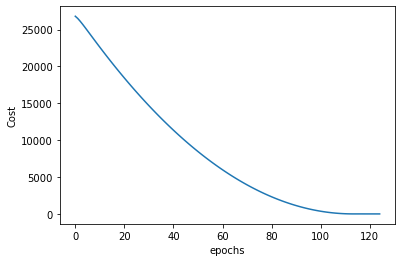

In [99]:
plt.xlabel("epochs")
plt.ylabel("Cost")
plt.plot(ADAM_epoch_list,ADAM_cost_list)

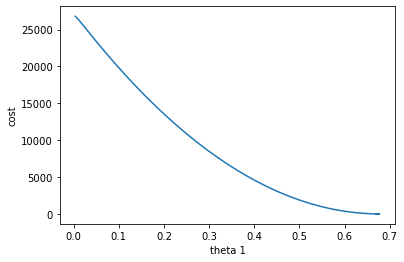

In [100]:
plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(ADAM_theta_1,ADAM_cost_list)

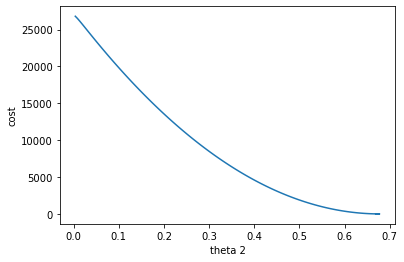

In [101]:
plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(ADAM_theta_2,ADAM_cost_list)

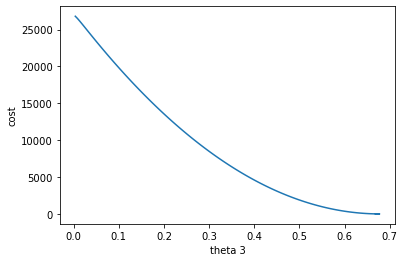

In [102]:
plt.xlabel("theta 3")
plt.ylabel("cost")
plt.plot(ADAM_theta_3,ADAM_cost_list)

In [103]:
y_hat = np.dot(ADAM_theta,x.T)

In [104]:
r2_score(df.y_target,y_hat)

0.9785443768602788

# Adam with Mini BATCH

In [543]:
def adam_miniBatch_gradient_descent(x, y_true, epochs, batch = 5,learning_rate = 0.0009 , Bita1 = 0.9 , Bita2 = 0.9):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape = (num_features))
    mt = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    theta_3 = []
    hypothesis = []
    batch_size=int(len(y_true)/ batch)
    for i in range(epochs):
        
        if i > 2 :
            if np.abs(cost_list[-1] - cost_list[-2]) < 0.001 :
                print("Stopped at epoch number  = ",i)
                break
            if np.linalg.norm(thetas_grad) < 0.001:
                print("Stopped at epoch number  = ",i)
                break
                
        for j in range(0,Nobservations,batch_size):
            
            x_batch = x[j : j+batch_size]
            y_batch = y_true[j : j+batch_size]
            
           # Calculate Y predected
            y_predict = np.dot( thetas , x_batch.T )
            # Getting the gradient with current thetas values
            thetas_grad = (2/len(x_batch))*(x_batch.T.dot(y_predict - y_batch))
            # Calculating Mt
            mt = (Bita1 * mt) + ((1-Bita1) * thetas_grad)
            # Calculate Vt 
            vt = (Bita2 * vt) + ((1 - Bita2) * np.square(thetas_grad))
            # Updating thetas values
            thetas = thetas - ( (learning_rate / (np.sqrt(vt) + 1e-11)) * mt)
            # Calculate the cost value 
            cost = np.mean(np.square(y_predict - y_batch))
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
        theta_3.append(thetas[2])
        
    Hypo = np.dot(thetas, x.T)
    hypothesis.append(Hypo)
    return thetas, theta_1, theta_2, theta_3, cost, cost_list, epochs_list, hypothesis
        
        


In [544]:
ADAM_theta_mini, ADAM_thetamini_1, ADAM_thetamini_2, ADAM_thetamini_3, ADAM_mini_cost, ADAM_mini_cost_list, ADAM_mini_epoch_list, ADAM_mini_Hypothesis= adam_miniBatch_gradient_descent(x,y,500)
ADAM_theta_mini, ADAM_mini_cost

Stopped at epoch number  =  163


(array([0.67633228, 0.67070527, 0.66901675, 0.67590263]), 26.312969951741103)

In [545]:
ADAM_mini_Hypothesis

[array([153.85185431, 184.78434108, 182.08086235, 198.2179428 ,
        141.10610667, 104.17312681, 148.506738  , 110.21857583,
        172.71125083, 159.97265266, 143.12706048, 141.12858464,
        188.11565306, 156.52428067, 149.18432915, 187.48106573,
        149.12897849, 178.07391133, 179.3755633 , 160.56423617,
        174.04084171, 173.37169317, 165.97145722, 155.16740983,
        191.4933459 ])]

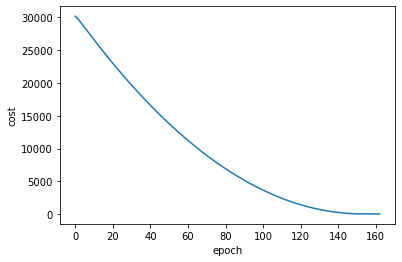

In [546]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(ADAM_mini_epoch_list,ADAM_mini_cost_list)

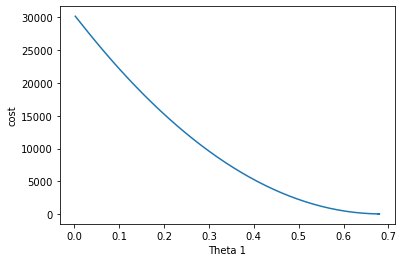

In [547]:
plt.xlabel("Theta 1")
plt.ylabel("cost")
plt.plot(ADAM_thetamini_1,ADAM_mini_cost_list)

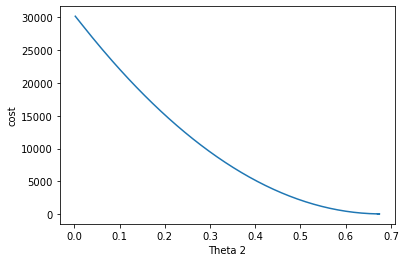

In [548]:
plt.xlabel("Theta 2")
plt.ylabel("cost")
plt.plot(ADAM_thetamini_2,ADAM_mini_cost_list)

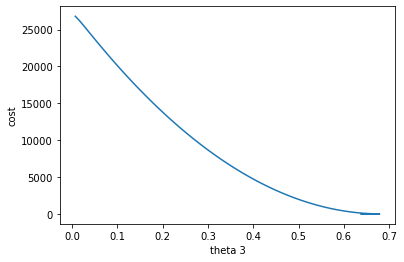

In [549]:
plt.xlabel("theta 3")
plt.ylabel("cost")
plt.plot(ADAM_theta_3,ADAM_cost_list)

In [550]:
y_hat = np.dot(ADAM_theta_mini,x.T)

In [551]:
r2_score(df.y_target,y_hat)

0.9783759062635733